In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key as api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | saint-francois
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | safford
Processing Record 6 of Set 1 | lubana
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | challapata
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 11 of Set 1 | hopkinsville
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | acarau
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | porbandar
Processing Record 18 of Set 1 | talaya
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | manzhouli
Processing Record 21 of Set 1 | mar del plata
Processing Record 2

Processing Record 39 of Set 4 | port-cartier
Processing Record 40 of Set 4 | nkhata bay
Processing Record 41 of Set 4 | maple creek
Processing Record 42 of Set 4 | bonita
Processing Record 43 of Set 4 | okato
Processing Record 44 of Set 4 | sakakah
Processing Record 45 of Set 4 | wake forest
Processing Record 46 of Set 4 | svetlaya
Processing Record 47 of Set 4 | hasaki
Processing Record 48 of Set 4 | luena
Processing Record 49 of Set 4 | abu samrah
Processing Record 50 of Set 4 | rondonopolis
Processing Record 1 of Set 5 | huizhou
Processing Record 2 of Set 5 | te anau
Processing Record 3 of Set 5 | el campo
Processing Record 4 of Set 5 | sao joao de pirabas
Processing Record 5 of Set 5 | kulhudhuffushi
Processing Record 6 of Set 5 | bluff
Processing Record 7 of Set 5 | georgetown
Processing Record 8 of Set 5 | arrifes
Processing Record 9 of Set 5 | poum
Processing Record 10 of Set 5 | kota kinabalu
Processing Record 11 of Set 5 | butia
Processing Record 12 of Set 5 | mananara
Process

Processing Record 30 of Set 8 | pimenta bueno
Processing Record 31 of Set 8 | esso
Processing Record 32 of Set 8 | padang
Processing Record 33 of Set 8 | belaya gora
Processing Record 34 of Set 8 | shizunai
Processing Record 35 of Set 8 | ancud
Processing Record 36 of Set 8 | surt
Processing Record 37 of Set 8 | benjamin constant
Processing Record 38 of Set 8 | sola
Processing Record 39 of Set 8 | meulaboh
Processing Record 40 of Set 8 | odweyne
Processing Record 41 of Set 8 | tawang
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | bathsheba
Processing Record 44 of Set 8 | maragogi
Processing Record 45 of Set 8 | sorland
Processing Record 46 of Set 8 | nassau
Processing Record 47 of Set 8 | bhadrachalam
Processing Record 48 of Set 8 | kieta
Processing Record 49 of Set 8 | ola
Processing Record 50 of Set 8 | mildura
Processing Record 1 of Set 9 | lima
Processing Record 2 of Set 9 | santa maria del oro
Processing Record 3 of Set 9 | baykalovo
Processing Record 4 o

Processing Record 20 of Set 12 | yen bai
Processing Record 21 of Set 12 | ranong
Processing Record 22 of Set 12 | mecca
Processing Record 23 of Set 12 | the valley
Processing Record 24 of Set 12 | lolua
City not found. Skipping...
Processing Record 25 of Set 12 | ciras
City not found. Skipping...
Processing Record 26 of Set 12 | namatanai
Processing Record 27 of Set 12 | bonavista
Processing Record 28 of Set 12 | cabo san lucas
Processing Record 29 of Set 12 | salima
Processing Record 30 of Set 12 | najran
Processing Record 31 of Set 12 | sorgun
Processing Record 32 of Set 12 | pemangkat
Processing Record 33 of Set 12 | nicolas bravo
Processing Record 34 of Set 12 | beyneu
Processing Record 35 of Set 12 | agva
City not found. Skipping...
Processing Record 36 of Set 12 | lensk
Processing Record 37 of Set 12 | morondava
Processing Record 38 of Set 12 | kjollefjord
Processing Record 39 of Set 12 | manavalakurichi
Processing Record 40 of Set 12 | yatou
Processing Record 41 of Set 12 | virg

In [7]:
print(len(city_data))

586


In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,11.41,91,90,13.80,CA,2021-11-25 23:58:55
1,Saint-Francois,46.4154,3.9054,34.68,91,90,4.61,FR,2021-11-25 23:57:07
2,Puerto Ayora,-0.7393,-90.3518,70.56,87,73,11.01,EC,2021-11-25 23:58:56
3,Cape Town,-33.9258,18.4232,66.09,60,0,13.80,ZA,2021-11-25 23:58:58
4,Safford,32.8340,-109.7076,54.10,56,78,14.03,US,2021-11-25 23:58:59
5,Lubana,56.9000,26.7167,34.68,94,100,11.56,LV,2021-11-25 23:59:00
6,Butaritari,3.0707,172.7902,82.49,73,95,17.34,KI,2021-11-25 23:59:00
7,Challapata,-18.9000,-66.7667,49.62,73,99,10.29,BO,2021-11-25 23:59:01
8,Vaini,-21.2000,-175.2000,87.96,79,75,6.91,TO,2021-11-25 23:59:01
9,Hopkinsville,36.8656,-87.4886,43.32,89,93,11.01,US,2021-11-25 23:59:02


In [9]:
#Reorder columns
new_column_order=['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2021-11-25 23:58:55,62.4560,-114.3525,11.41,91,90,13.80
1,Saint-Francois,FR,2021-11-25 23:57:07,46.4154,3.9054,34.68,91,90,4.61
2,Puerto Ayora,EC,2021-11-25 23:58:56,-0.7393,-90.3518,70.56,87,73,11.01
3,Cape Town,ZA,2021-11-25 23:58:58,-33.9258,18.4232,66.09,60,0,13.80
4,Safford,US,2021-11-25 23:58:59,32.8340,-109.7076,54.10,56,78,14.03
...,...,...,...,...,...,...,...,...,...
581,Guiratinga,BR,2021-11-26 00:15:13,-16.3494,-53.7583,75.81,82,91,1.32
582,Filadelfia,US,2021-11-26 00:11:53,39.9523,-75.1638,50.45,61,75,1.99
583,Korem,ET,2021-11-26 00:15:14,12.5058,39.5228,51.89,65,64,4.61
584,Santa Vitoria Do Palmar,BR,2021-11-26 00:15:14,-33.5189,-53.3681,64.40,96,99,5.17


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

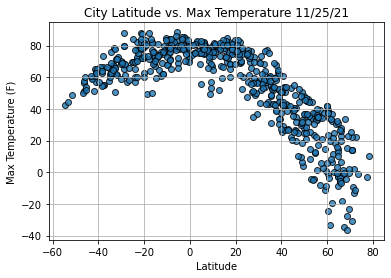

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

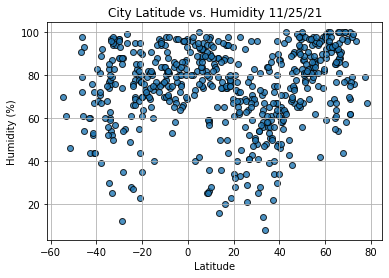

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

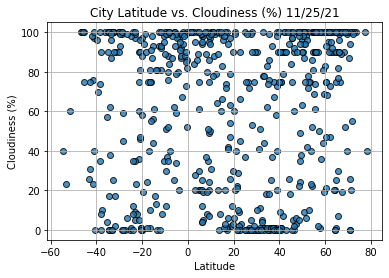

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

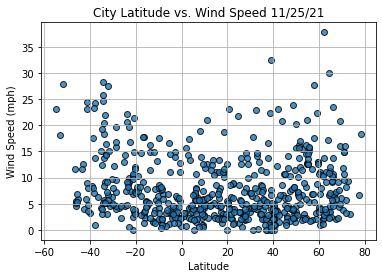

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()